In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV
products = pd.read_csv('products.csv')
sales = pd.read_csv('sales.csv')
marketing = pd.read_csv('marketing.csv')
reviews = pd.read_csv('reviews.csv')

print(products.shape, sales.shape, marketing.shape, reviews.shape)

(15, 7) (1000000, 10) (20, 8) (10000, 7)


# PRE PROCESSING DATA

In [3]:
products.head()

,product_id,product_name,brand,type,size_ml,base_price,launch_date
0,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000,2020-02-15
1,PC002,Sunsilk Black Shine Conditioner 340ml,Sunsilk,Conditioner,340,33000,2020-06-10
2,PC003,Lifebuoy Total10 Body Wash 400ml,Lifebuoy,Body Wash,400,28000,2020-03-20
3,PC004,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000,2021-05-01
4,PC005,Dove Deep Moisture Lotion 200ml,Dove,Lotion,200,35000,2021-11-12


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    15 non-null     object
 1   product_name  15 non-null     object
 2   brand         15 non-null     object
 3   type          15 non-null     object
 4   size_ml       15 non-null     int64 
 5   base_price    15 non-null     int64 
 6   launch_date   15 non-null     object
dtypes: int64(2), object(5)
memory usage: 972.0+ bytes


In [5]:
products.isnull().sum()

product_id      0
product_name    0
brand           0
type            0
size_ml         0
base_price      0
launch_date     0
dtype: int64

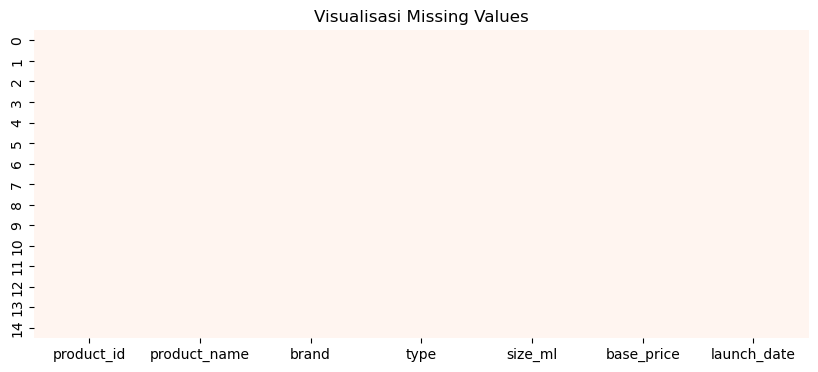

In [6]:
plt.figure(figsize=(10,4))
sns.heatmap(products.isnull(), cbar=False, cmap='Reds')
plt.title("Visualisasi Missing Values")
plt.show()

In [7]:
products.duplicated().sum()

0

In [8]:
products['launch_date'] = pd.to_datetime(products['launch_date'])

In [9]:
num_cols = products.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = products[col].quantile(0.25)
    Q3 = products[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = products[(products[col] < lower) | (products[col] > upper)]
    print(f"Kolom {col}: {len(outliers)} outlier")

Kolom size_ml: 0 outlier
Kolom base_price: 1 outlier


In [10]:
if len(outliers) > 0:
    # Mengganti outlier dengan batas bawah/atas (winsorizing)
    products[col] = np.where(products[col] < lower, lower, products[col])
    products[col] = np.where(products[col] > upper, upper, products[col])
    print(f"Outlier {col} ditangani dengan winsorizing")

Outlier base_price ditangani dengan winsorizing


{'whiskers': [<matplotlib.lines.Line2D at 0x1f70a6c2450>,
 'caps': [<matplotlib.lines.Line2D at 0x1f70a6f7fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f70a6f5d90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f70c82d750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f70c82d6d0>],
 'means': []}

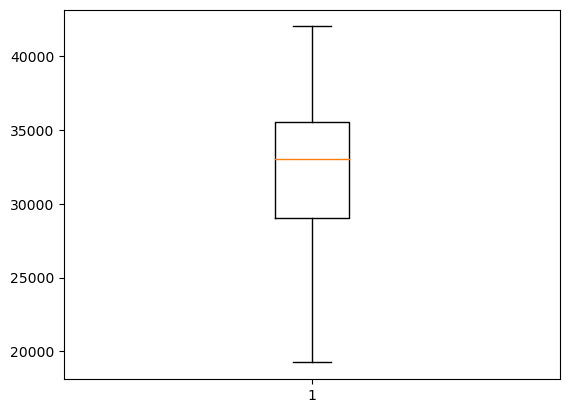

In [11]:
plt.boxplot(products["base_price"])

PROCESSING MARKETING

In [12]:
marketing.head()

,campaign_id,product_id,campaign_name,start_date,end_date,spend_idr,channel,engagement_rate
0,MKT001,PC010,Campaign_1_PC010,2020-10-12,2020-12-14,256411579,TV,0.566
1,MKT002,PC008,Campaign_2_PC008,2020-06-30,2020-08-29,582461991,TV,0.376
2,MKT003,PC006,Campaign_3_PC006,2021-09-01,2021-09-22,884233026,TV,0.117
3,MKT004,PC015,Campaign_4_PC015,2025-04-23,2025-07-04,1139498941,Influencer,0.560
4,MKT005,PC003,Campaign_5_PC003,2021-07-15,2021-09-08,340924224,Billboard,0.091


In [13]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      20 non-null     object 
 1   product_id       20 non-null     object 
 2   campaign_name    20 non-null     object 
 3   start_date       20 non-null     object 
 4   end_date         20 non-null     object 
 5   spend_idr        20 non-null     int64  
 6   channel          20 non-null     object 
 7   engagement_rate  20 non-null     float64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.4+ KB


In [14]:
marketing.isnull().sum()

campaign_id        0
product_id         0
campaign_name      0
start_date         0
end_date           0
spend_idr          0
channel            0
engagement_rate    0
dtype: int64

In [15]:
marketing.duplicated().sum()

0

In [16]:
marketing['start_date'] = pd.to_datetime(marketing['start_date'])
marketing['end_date'] = pd.to_datetime(marketing['end_date'])

In [17]:
num_cols = marketing.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = marketing[col].quantile(0.25)
    Q3 = marketing[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = marketing[(marketing[col] < lower) | (marketing[col] > upper)]
    print(f"Kolom {col}: {len(outliers)} outlier")

Kolom spend_idr: 0 outlier
Kolom engagement_rate: 0 outlier


PROCESSING REVIEWS

In [18]:
reviews.head()

,review_id,product_id,date,rating,sentiment,platform,comment
0,R100000,PC014,2024-10-16,4.6,Positive,Instagram,"Packaging bocor saat diterima, kurang aman."
1,R100001,PC012,2023-06-27,2.8,Negative,Instagram,"Mudah dibeli saat promo, value for money."
2,R100002,PC003,2022-10-21,3.2,Neutral,Shopee,"Mudah dibeli saat promo, value for money."
3,R100003,PC010,2025-03-07,2.0,Negative,Tokopedia,"Mudah dibeli saat promo, value for money."
4,R100004,PC015,2022-03-03,1.5,Negative,Shopee,Memberikan hasil sesuai klaim after 2 weeks.


In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   10000 non-null  object 
 1   product_id  10000 non-null  object 
 2   date        10000 non-null  object 
 3   rating      10000 non-null  float64
 4   sentiment   10000 non-null  object 
 5   platform    10000 non-null  object 
 6   comment     10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


In [20]:
reviews.isnull().sum()

review_id     0
product_id    0
date          0
rating        0
sentiment     0
platform      0
comment       0
dtype: int64

In [21]:
reviews.duplicated().sum()

0

In [22]:
num_cols = reviews.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = reviews[col].quantile(0.25)
    Q3 = reviews[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = reviews[(reviews[col] < lower) | (reviews[col] > upper)]
    print(f"Kolom {col}: {len(outliers)} outlier")

Kolom rating: 0 outlier


In [23]:
import re
positives = ["bagus", "mantap", "baik", "aman", "murah", "puas", "cepat", "value for money", "recommended", "sesuai", "suka", "ramah"]
negatives = ["buruk", "bocor", "jelek", "lambat", "tidak", "kurang", "mahal", "mengecewakan", "tidak puas", "lelet"]

def get_sentiment_simple(text):
    text = str(text).lower()
    pos = sum(1 for w in positives if w in text)
    neg = sum(1 for w in negatives if w in text)
    if pos > neg:
        return "Positive"
    elif neg > pos:
        return "Negative"
    else:
        return "Neutral"

reviews["sentiment_auto"] = reviews["comment"].apply(get_sentiment_simple)
print(reviews[["comment", "sentiment_auto"]])

                                           comment sentiment_auto
0      Packaging bocor saat diterima, kurang aman.       Negative
1        Mudah dibeli saat promo, value for money.       Positive
2        Mudah dibeli saat promo, value for money.       Positive
3        Mudah dibeli saat promo, value for money.       Positive
4     Memberikan hasil sesuai klaim after 2 weeks.       Positive
...                                            ...            ...
9995                Wangi terlalu kuat untuk saya.        Neutral
9996     Mudah dibeli saat promo, value for money.       Positive
9997          Kemasan baru lebih ramah lingkungan.       Positive
9998                   Harga sesuai, kualitas oke.       Positive
9999                   Harga sesuai, kualitas oke.       Positive

[10000 rows x 2 columns]


Setelah diperhatikan lebih detail, sentiment tidak begitu sesuai dengan comment nya, maka melakukan perbaikan dengan keyword yang lebih sesuai dengan comment nya sehingga bisa menghasilkan sentimnet yang sesuai juga

In [25]:
reviews.to_csv("review.csv", index=False)

In [26]:
review = pd.read_csv('review.csv')

In [27]:
review.head()

,review_id,product_id,date,rating,sentiment,platform,comment,sentiment_auto
0,R100000,PC014,2024-10-16,4.6,Positive,Instagram,"Packaging bocor saat diterima, kurang aman.",Negative
1,R100001,PC012,2023-06-27,2.8,Negative,Instagram,"Mudah dibeli saat promo, value for money.",Positive
2,R100002,PC003,2022-10-21,3.2,Neutral,Shopee,"Mudah dibeli saat promo, value for money.",Positive
3,R100003,PC010,2025-03-07,2.0,Negative,Tokopedia,"Mudah dibeli saat promo, value for money.",Positive
4,R100004,PC015,2022-03-03,1.5,Negative,Shopee,Memberikan hasil sesuai klaim after 2 weeks.,Positive


In [28]:
review = review.drop(columns=['sentiment'])

In [29]:
review['date'] = pd.to_datetime(review['date'])

PROCESSING SALES

In [30]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   transaction_id     1000000 non-null  object 
 1   date               1000000 non-null  object 
 2   product_id         1000000 non-null  object 
 3   region             1000000 non-null  object 
 4   channel            1000000 non-null  object 
 5   units_sold         1000000 non-null  int64  
 6   avg_price          1000000 non-null  float64
 7   discount_pct       1000000 non-null  int64  
 8   revenue            1000000 non-null  float64
 9   days_since_launch  1000000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 76.3+ MB


In [31]:
sales.isnull().sum()

transaction_id       0
date                 0
product_id           0
region               0
channel              0
units_sold           0
avg_price            0
discount_pct         0
revenue              0
days_since_launch    0
dtype: int64

In [32]:
sales.duplicated().sum()

0

In [33]:
sales['date'] = pd.to_datetime(sales['date'])

In [34]:
num_cols = sales.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = sales[col].quantile(0.25)
    Q3 = sales[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = sales[(sales[col] < lower) | (sales[col] > upper)]
    print(f"Kolom {col}: {len(outliers)} outlier")

Kolom units_sold: 11819 outlier
Kolom avg_price: 11195 outlier
Kolom discount_pct: 0 outlier
Kolom revenue: 15620 outlier
Kolom days_since_launch: 0 outlier


{'whiskers': [<matplotlib.lines.Line2D at 0x1f70cb45110>,
 'caps': [<matplotlib.lines.Line2D at 0x1f70c83f2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f70cb446d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f70cb47310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f70cb47bd0>],
 'means': []}

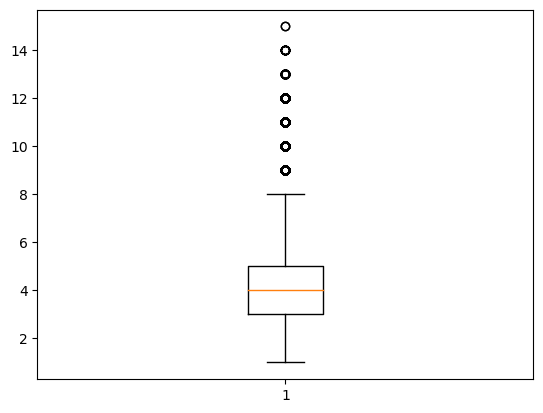

In [35]:
plt.boxplot(sales["units_sold"])

In [36]:
outliers_units_sold = sales[
    (sales["units_sold"] > sales["units_sold"].quantile(0.75) + 1.5 * (sales["units_sold"].quantile(0.75) - sales["units_sold"].quantile(0.25)))
    | (sales["units_sold"] < sales["units_sold"].quantile(0.25) - 1.5 * (sales["units_sold"].quantile(0.75) - sales["units_sold"].quantile(0.25)))
]
print(outliers_units_sold)

                              transaction_id       date product_id  \
14      21fd153a-8cea-456c-8fa7-3bb3adb7e60f 2021-07-16      PC014   
111     dfad45ec-678e-411c-8400-3ad4fe2be54f 2025-05-14      PC002   
164     99b1cb7a-31c7-44d0-ba9a-8e8fb5f77c56 2022-06-02      PC007   
183     7ad4e129-433b-49bf-b38c-82bb0734d0e3 2023-03-16      PC011   
221     7b3c9729-8bba-4361-906e-43dff731fed7 2022-06-21      PC015   
...                                      ...        ...        ...   
999472  4b453ead-80cd-44da-84e6-ed8e054d9884 2022-04-06      PC013   
999517  6428da6d-3575-4982-aac2-f256bfac19b6 2023-02-03      PC011   
999821  7c4343cb-b511-46c0-8db8-507d9d11afed 2021-08-09      PC014   
999886  f70526f8-0d30-4ee8-b3cd-2ef85e46255d 2022-04-08      PC015   
999946  818b06ef-f331-4f4a-947c-45fb3480f1a3 2023-06-04      PC007   

            region         channel  units_sold  avg_price  discount_pct  \
14        Surabaya     Hypermarket           9   35170.06             0   
111      

In [37]:
Q3 = sales['units_sold'].quantile(0.75)
IQR = Q3 - sales['units_sold'].quantile(0.25)
threshold = Q3 + 1.5 * IQR

produk_inovatif = sales[sales['units_sold'] > threshold]
print(produk_inovatif[['product_id', 'units_sold', 'revenue']])

       product_id  units_sold    revenue
14          PC014           9  316530.51
111         PC002           9  242414.60
164         PC007           9  283784.76
183         PC011           9  301718.49
221         PC015           9  127127.28
...           ...         ...        ...
999472      PC013          10  250075.44
999517      PC011           9  305376.01
999821      PC014           9  319296.97
999886      PC015           9  169842.90
999946      PC007          10  374573.80

[11819 rows x 3 columns]


In [38]:
# Pilih hanya kolom numerik
num_cols = sales.select_dtypes(include=np.number).columns

# Loop untuk setiap kolom numerik
for col in num_cols:
    Q1 = sales[col].quantile(0.25)
    Q3 = sales[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan batas bawah/atas
    sales[col] = np.where(
        sales[col] > upper, upper,
        np.where(sales[col] < lower, lower, sales[col])
    )

sales.to_csv("saless.csv")

In [39]:
sales2 = pd.read_csv('saless.csv')

In [40]:
num_cols = sales2.select_dtypes(include=np.number).columns

for col in num_cols:
    Q1 = sales2[col].quantile(0.25)
    Q3 = sales2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = sales2[(sales2[col] < lower) | (sales2[col] > upper)]
    print(f"Kolom {col}: {len(outliers)} outlier")

Kolom Unnamed: 0: 0 outlier
Kolom units_sold: 0 outlier
Kolom avg_price: 0 outlier
Kolom discount_pct: 0 outlier
Kolom revenue: 0 outlier
Kolom days_since_launch: 0 outlier


{'whiskers': [<matplotlib.lines.Line2D at 0x1f71b78b610>,
 'caps': [<matplotlib.lines.Line2D at 0x1f71b79c8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f70cb0df90>],
 'medians': [<matplotlib.lines.Line2D at 0x1f71b79db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f71b78b550>],
 'means': []}

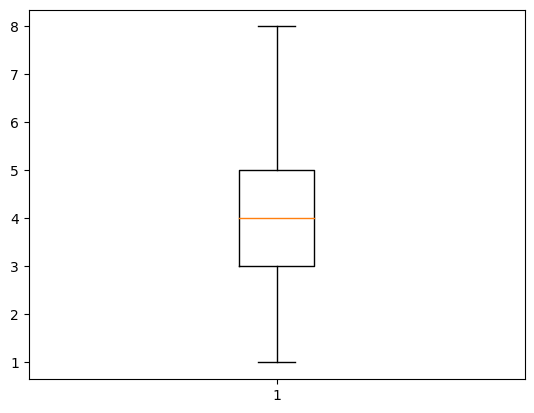

In [41]:
plt.boxplot(sales2["units_sold"])

# FEATURE ENGINEERING

Menggabungkan tabel

In [42]:
# Merge sales dengan products
sales2 = sales.merge(products, on='product_id', how='left')

# Menggabung dengan marketing (multiple campaign per produk, ambil mean engagement rate)
marketing_summary = marketing.groupby('product_id').agg({
    'spend_idr': 'sum',
    'engagement_rate': 'mean'
}).reset_index()

sales2 = sales2.merge(marketing_summary, on='product_id', how='left')

# Gabung dengan review (rata-rata rating dan proporsi sentimen positif)
review_summary = review.groupby('product_id').agg({
    'rating': 'mean',
    'sentiment_auto': lambda x: (x == 'Positive').mean()  
}).rename(columns={'rating': 'avg_rating', 'sentiment_auto': 'positive_ratio'}).reset_index()

sales2 = sales2.merge(review_summary, on='product_id', how='left')

- sales merge : Menambahkan informasi produk ke data sales
- mengelompokkan data marketing berdasarkan produk.
1. spend_idr: 'sum' → total pengeluaran marketing per produk.
2. engagement_rate: 'mean' → rata-rata engagement rate dari semua kampanye per produk.
3. reset_index() → mengubah hasil groupby menjadi dataframe standar, bukan multi-index.
4. Hasil: marketing_summary berisi satu baris per produk dengan total spend dan rata-rata engagement.

Feature turunan dari data Penjualan

In [43]:
# Harga efektif setelah diskon
sales2['effective_price'] = sales2['avg_price'] * (1 - sales2['discount_pct'] / 100)

# Margin estimasi (base_price dari tabel products)
sales2['margin'] = sales2['effective_price'] - sales2['base_price']

# Revenue per unit (profitabilitas penjualan)
sales2['revenue_per_unit'] = sales2['revenue'] / sales2['units_sold']

# Log transform untuk menstabilkan data (forecasting & modeling)
sales2['log_revenue'] = np.log1p(sales2['revenue'])
sales2['log_units_sold'] = np.log1p(sales2['units_sold'])

Berbasis waktu trend Forcasting

In [44]:
# Umur produk saat transaksi
products['product_age_days'] = (sales2['date'] - products['launch_date']).dt.days

# Kategori umur produk
products['product_lifecycle_stage'] = pd.cut(products['product_age_days'],
    bins=[-np.inf, 180, 365, 730, np.inf],
    labels=['New', 'Growth', 'Mature', 'Decline']
)

In [45]:
sales2.head()

,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch,...,launch_date,spend_idr,engagement_rate,avg_rating,positive_ratio,effective_price,margin,revenue_per_unit,log_revenue,log_units_sold
0,fa43024c-7c61-4e2b-bfd1-84915e86c4f7,2024-02-04,PC001,Semarang,Shopee,4.0,31721.61,5.0,126886.45,1450.0,...,2020-02-15,7.177514e+08,0.422000,3.032625,0.637329,30135.5295,-1864.4705,31721.612500,11.751056,1.609438
1,cc02b941-61b7-4e37-b385-ecfc2fe2a0b0,2022-05-31,PC004,Medan,Tokopedia,4.0,23148.20,0.0,92592.80,395.0,...,2021-05-01,2.191606e+09,0.243667,2.983619,0.625585,23148.2000,-1851.8000,23148.200000,11.435977,1.609438
2,378b66ac-8b18-43e3-8b91-cfbb0ee1d346,2020-10-24,PC013,Palembang,Alfamart,5.0,25396.69,20.0,126983.43,-1178.0,...,2024-01-15,4.952906e+08,0.457000,3.033672,0.628447,20317.3520,-11682.6480,25396.686000,11.751820,1.791759
3,42ff9d7e-aba8-4444-b144-3ed288c3ae2c,2023-05-31,PC001,Medan,Tokopedia,7.0,30006.83,0.0,210047.84,1201.0,...,2020-02-15,7.177514e+08,0.422000,3.032625,0.637329,30006.8300,-1993.1700,30006.834286,12.255095,2.079442
4,605dfc68-c347-406e-b6af-2bb43cabc515,2024-05-06,PC009,Medan,Tokopedia,2.0,30927.25,5.0,61854.50,1324.0,...,2020-09-20,NaN,NaN,3.085000,0.593750,29380.8875,-4619.1125,30927.250000,11.032556,1.098612


In [46]:
products.head()

,product_id,product_name,brand,type,size_ml,base_price,launch_date,product_age_days,product_lifecycle_stage
0,PC001,Sunsilk Smooth & Shine Shampoo 340ml,Sunsilk,Shampoo,340,32000.0,2020-02-15,1450.0,Decline
1,PC002,Sunsilk Black Shine Conditioner 340ml,Sunsilk,Conditioner,340,33000.0,2020-06-10,720.0,Mature
2,PC003,Lifebuoy Total10 Body Wash 400ml,Lifebuoy,Body Wash,400,28000.0,2020-03-20,218.0,Growth
3,PC004,Lifebuoy Mild Care Handwash 200ml,Lifebuoy,Handwash,200,25000.0,2021-05-01,760.0,Decline
4,PC005,Dove Deep Moisture Lotion 200ml,Dove,Lotion,200,35000.0,2021-11-12,906.0,Decline


- Decline : Demand turun (Pertimbangan repositioning / discontinue) untuk produk dari brand tersebut
- Mature : Demand stabil (Fokus efisiensi harga & margin)
- Growth : Demand naik (Produk sedang dievaluasi promosi & awareness)

Produk sunsilk smooth & shine shampoo dengan demand turun, maka jadi pertimbangan untuk diberikan diskon, produk sunsilk conditioner dengan deman stabil berarti bisa difokuskan untuk efisiensi harga, dan lifebuoy body wash dengan deman naik maka produk tersebut bisa dilakukan evaluasi promosi dan awareness

Melakukan innovation index

In [47]:
# Kombinasi marketing, sentiment, dan margin untuk indikator inovasi pasar
sales2['innovation_index'] = (
    0.4 * sales2['positive_ratio'].fillna(0) +
    0.3 * sales2['engagement_rate'].fillna(0) +
    0.3 * (sales2['margin'].fillna(0) / sales2['base_price'].replace(0, np.nan).fillna(1))
)

- Mengukur seberapa inovatif sebuah produk dari sisi pasar & strategi.
- Jadi indikator tambahan untuk menjelaskan kenapa demand naik/turun.
- Bisa digunakan sebagai prediktor (X) dalam forecasting jangka panjang

Trend untuk forecasting

In [48]:
# Tren penjualan per region dan channel
trend_features = (
    sales2.groupby(['region', 'channel', 'product_id'])[['units_sold', 'revenue']]
    .sum()
    .reset_index()
)

# Rasio pertumbuhan revenue dari waktu ke waktu per produk
sales2['revenue_growth_rate'] = (
    sales2.groupby('product_id')['revenue']
    .pct_change()
    .replace([np.inf, -np.inf], 0)
    .fillna(0)
)

Produk Cannibalization

In [49]:
# Menghitung total units_sold per brand, tanggal, dan product_id
brand_sales = (
    sales2.groupby(['brand', 'date', 'product_id'])['units_sold']
    .sum()
    .reset_index()
)

# Pivot agar tiap product jadi kolom (per brand & tanggal)
brand_pivot = brand_sales.pivot_table(
    index=['date', 'brand'],
    columns='product_id',
    values='units_sold',
    fill_value=0
)

# Menghitung korelasi antar produk dalam satu brand
brand_corr = brand_pivot.corr()

In [50]:
brand_corr.head()

product_id,PC001,PC002,PC003,PC004,PC005,PC006,PC007,PC008,PC009,PC010,PC011,PC012,PC013,PC014,PC015
product_id,,,,,,,,,,,,,,,
PC001,1.000000,0.956445,-0.136722,-0.136821,-0.136769,-0.136812,-0.136834,-0.136777,-0.136760,-0.136826,-0.136818,-0.136721,0.956855,-0.136772,-0.136681
PC002,0.956445,1.000000,-0.136777,-0.136875,-0.136824,-0.136866,-0.136888,-0.136831,-0.136815,-0.136881,-0.136872,-0.136775,0.958194,-0.136826,-0.136736
PC003,-0.136722,-0.136777,1.000000,0.957007,-0.136796,-0.136838,-0.136860,-0.136803,-0.136787,-0.136853,-0.136844,-0.136747,-0.136768,-0.136798,0.958020
PC004,-0.136821,-0.136875,0.957007,1.000000,-0.136894,-0.136937,-0.136958,-0.136901,-0.136885,-0.136951,-0.136943,-0.136846,-0.136867,-0.136896,0.957091
PC005,-0.136769,-0.136824,-0.136796,-0.136894,1.000000,0.957779,-0.136907,-0.136850,-0.136833,-0.136900,-0.136891,-0.136794,-0.136815,0.957094,-0.136754


1. Terdapat beberapa pasangan produk yang menunjukkan korelasi positif sangat tinggi (0.95 – 0.97).
- Seperti: PC001–PC002, PC003–PC004, PC004–PC005, dan PC013–PC014.
Hal ini menunjukkan bahwa pola penjualan produk-produk tersebut bergerak secara hampir identik dari waktu ke waktu. Dengan kata lain, ketika penjualan salah satu produk meningkat, produk pasangannya juga cenderung meningkat pada periode yang sama. Ini mengindikasikan bahwa produk-produk tersebut kemungkinan berada dalam kategori atau varian yang sama, memiliki target konsumen yang mirip, atau sering dibeli secara bersamaan. Produk dengan korelasi tinggi dapat dikelompokkan (clustering) dan dianalisis sebagai satu kesatuan karena perilaku penjualannya serupa.

2. Sebagian besar pasangan produk lainnya menunjukkan korelasi negatif rendah (sekitar -0.13).
Nilai negatif yang kecil ini tidak menunjukkan hubungan yang kuat atau signifikan secara praktis. Artinya, perubahan penjualan satu produk tidak memiliki pengaruh berarti terhadap penjualan produk lainnya. Ini menunjukkan bahwa produk-produk tersebut memiliki pola penjualan yang berbeda, berfungsi di kategori berbeda, atau ditujukan untuk segmen konsumen yang tidak sama.

Secara keseluruhan, hasil korelasi menunjukkan bahwa hanya beberapa kelompok produk yang memiliki pola penjualan yang serupa, sedangkan sebagian besar produk bersifat independen satu sama lain. Analisis korelasi ini dapat digunakan untuk:
- mengelompokkan produk berdasarkan perilaku penjualannya,
- menentukan potensi bundling atau strategi promosi bersama,
- serta membantu pemilihan model forecasting yang lebih tepat untuk tiap kelompok produk.

# INNOVATION MODEL

membantu model menganalisis posisi produk dalam pasar → terkait Innovation Radar.

In [51]:
# Membuat kategori target berdasarkan distribusi units_sold
sales2['demand_level'] = pd.qcut(
    sales2['units_sold'], q=3, labels=['Low', 'Medium', 'High']
)

In [52]:
# Memisahkan fitur & target
X = sales2.drop(columns=['demand_level'])
y = sales2['demand_level']

In [53]:
# Memastikan data diurutkan berdasarkan date untuk time-aware split
sales2 = sales2.sort_values("date")

split_point = int(len(sales2) * 0.8)

X_train = X.iloc[:split_point]
X_test  = X.iloc[split_point:]
y_train = y.iloc[:split_point]
y_test  = y.iloc[split_point:]

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (800000, 27)
Data testing: (200000, 27)


In [54]:
#cek imbalenced
sales2['demand_level'].value_counts(normalize=True)*100

demand_level
Low       42.2650
Medium    39.2138
High      18.5212
Name: proportion, dtype: float64

Hasil pembentukan kategori demand level menunjukkan distribusi kelas sebagai berikut: 
- Low (42.27%)
- Medium (39.21%)
- High (18.52%)
Distribusi ini mengindikasikan adanya ketidakseimbangan kelas, khususnya karena kategori High memiliki proporsi yang jauh lebih kecil. Ketidakseimbangan ini penting diperhatikan karena berpotensi menyebabkan model cenderung lebih akurat pada kelas mayoritas, sehingga diperlukan strategi penanganan imbalance pada tahap pemodelan.

In [55]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder

# Encode label ke angka 
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)

# Memilih fitur numerik dan mengisi NaN agar SMOTE tidak error
X_train_num = X_train.select_dtypes(include=['number']).fillna(X_train.median(numeric_only=True))

print("Distribusi sebelum balancing:", Counter(y_train))
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_res_num, y_res_encoded = smote.fit_resample(X_train_num, y_train_encoded)

# Decode hasil SMOTE agar kembali ke label teks
y_res = encoder.inverse_transform(y_res_encoded)

print("Distribusi sesudah balancing:", Counter(y_res))

Distribusi sebelum balancing: Counter({'Low': 338019, 'Medium': 314037, 'High': 147944})
Distribusi sesudah balancing: Counter({'Medium': 338019, 'High': 338019, 'Low': 338019})


SMOTE hanya dapat diaplikasikan pada fitur numerik karena algoritma ini menggunakan perhitungan jarak antar-sampel untuk mensintesis data baru. Oleh karena itu, dilakukan pemisahan antara fitur numerik dan kategorikal sebelum proses resampling. Setelah proses balancing selesai, fitur kategorikal digabungkan kembali agar struktur dataset tetap konsisten.

# VISUALISASI

# Innovation Radar

(menilai seberapa inovatif dan seberapa sukses di pasar setiap produk)

In [56]:
# Aggregasi performa pasar per product
product_performance = sales2.groupby('product_id').agg({
    'units_sold': 'mean',         
    'revenue': 'mean',
    'innovation_index': 'mean',   
    'brand': 'first',
    'product_name': 'first'
}).reset_index()

In [57]:
# Men normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
product_performance[['norm_units_sold', 'norm_innovation']] = scaler.fit_transform(
    product_performance[['units_sold', 'innovation_index']]
)

In [58]:
# Menentukan quadrant radar
product_performance['radar_segment'] = product_performance.apply(
    lambda row: (
        'Star Product' if row['norm_units_sold'] >= 0.5 and row['norm_innovation'] >= 0.5 else
        'Sleeper (High Innovation, Low Market)' if row['norm_units_sold'] < 0.5 and row['norm_innovation'] >= 0.5 else
        'Cash Cow (Low Innovation, High Market)' if row['norm_units_sold'] >= 0.5 and row['norm_innovation'] < 0.5 else
        'Lagging Product'
    ),
    axis=1
)

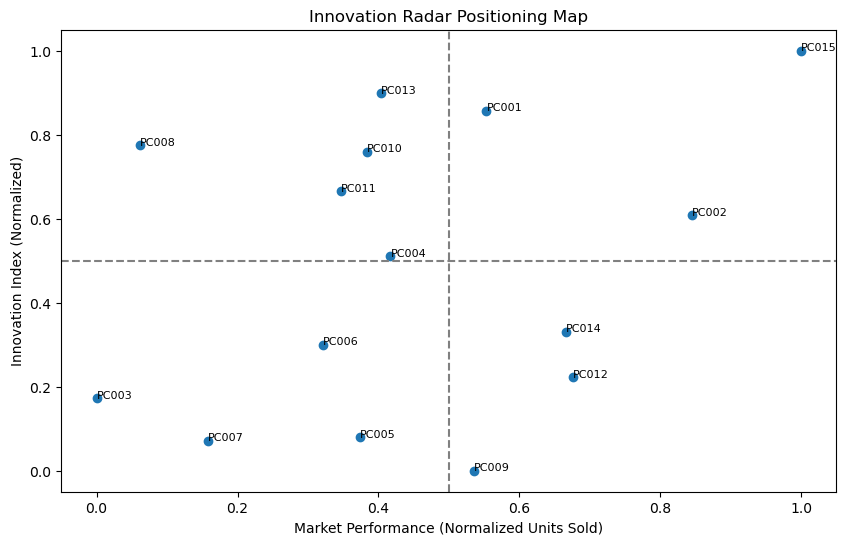

In [59]:
# Visualisasi innovation radar
plt.figure(figsize=(10, 6))
plt.scatter(product_performance['norm_units_sold'],
            product_performance['norm_innovation'])

for i in range(len(product_performance)):
    plt.text(product_performance['norm_units_sold'][i],
             product_performance['norm_innovation'][i],
             product_performance['product_id'].iloc[i], fontsize=8)

plt.axhline(0.5, color='gray', linestyle='--')
plt.axvline(0.5, color='gray', linestyle='--')

plt.xlabel("Market Performance (Normalized Units Sold)")
plt.ylabel("Innovation Index (Normalized)")
plt.title("Innovation Radar Positioning Map")
plt.show()

Grafik ini memetakan posisi setiap produk berdasarkan dua dimensi penting:
- Market Performance → Representasi dari penjualan (units sold) yang sudah dinormalisasi.
- Innovation Index → Indeks inovasi yang dihitung dari gabungan indikator seperti rating, engagement, margin, atau variabel lain yang menggambarkan nilai inovasi produk (juga dinormalisasi).

Penjelasan:
- X-axis (horizontal) : Market Performance: semakin ke kanan → penjualan semakin tinggi 
- Y-axis (vertical)   : Innovation Index: semakin ke atas → produk semakin inovatif     

Kuadran:
- Kanan-Atas (High Performance, High Innovation) : Merupakan produk ungulan yang sukses di pasar dan inovasinya dihargai (Maka perlu dipertahankan, dijadikan benchmark)     
- Kanan-Bawah (High Performance, Low Innovation) : Produk masih laku tetapi tidak inovatif (Bisa berisiko jenuh, perlu inovasi fitur / packaging / kampanye)
- Kiri-Atas (Low Performance, High Innovation) : Produk masih inovatif tapi belum terjual banyak (Perlu penguatan marketing / sosialisasi / edukasi pasar
- Kiri-Bawah (Low Performance, Low Innovation) : Produk masih lemah di pasar dan kurang nilai tambah nya (Diperlukan discontinue atau reposisi total)           

# TREND FORECASTING 

In [61]:
# Merge sales dengan info brand dari tabel products
sales_merged = sales2.merge(
    products[['product_id', 'brand']],
    on='product_id',
    how='left'
)
sales_merged.head()

,transaction_id,date,product_id,region,channel,units_sold,avg_price,discount_pct,revenue,days_since_launch,...,positive_ratio,effective_price,margin,revenue_per_unit,log_revenue,log_units_sold,innovation_index,revenue_growth_rate,demand_level,brand_y
0,d653e6de-faa6-4683-9a3b-4e952b395542,2020-01-01,PC005,Denpasar,Alfamart,5.0,30274.83,10.0,151374.16,-681.0,...,0.627660,27247.3470,-7752.6530,30274.8320,11.927517,1.791759,0.184613,-0.079909,Medium,Dove
1,4bafb564-e56b-4c3a-b4b0-ed29f8eb049d,2020-01-01,PC010,Yogyakarta,Shopee,4.0,39157.00,0.0,156627.98,-1172.0,...,0.618421,39157.0000,-2843.0000,39156.9950,11.961635,1.609438,0.344811,0.005668,Medium,Love Beauty & Planet
2,3a7f4aa1-f2d5-4d90-a8fb-36014f8a9988,2020-01-01,PC001,Bali,Tokopedia,2.0,29824.27,5.0,59648.54,-45.0,...,0.637329,28333.0565,-3666.9435,29824.2700,10.996242,1.098612,0.347154,-0.577743,Low,Sunsilk
3,4b0f4037-bfb6-464e-b97e-3e275af216d2,2020-01-01,PC015,Surabaya,Indomaret,2.0,15921.57,5.0,31843.15,-335.0,...,0.623358,15125.4915,-4124.5085,15921.5750,10.368609,1.098612,0.356965,-0.326535,Low,Lifebuoy
4,04286481-88dc-45f4-ab19-b782c4636f16,2020-01-01,PC008,Medan,Shopee,4.0,25994.84,0.0,103979.35,-1140.0,...,0.637313,25994.8400,-2005.1600,25994.8375,11.551957,1.609438,0.346242,0.388313,Medium,Rexona


UJI ADF TEST SETIAP BRAND NYA

In [62]:
from statsmodels.tsa.stattools import adfuller

brands = sales_merged['brand_y'].unique()
adf_results = []

for brand in brands:
    brand_data = sales_merged[sales_merged['brand_y'] == brand].copy()
    brand_data = brand_data.sort_values('date')

    # ambil variabel log_units_sold
    ts = brand_data['log_units_sold'].astype(float).values

    # uji ADF
    adf_stat, p_value, _, _, _, _ = adfuller(ts)

    if p_value < 0.05:
        status = "Data stasioner"
    else:
        status = "Data belum stasioner"

    adf_results.append({
        "Brand": brand,
        "ADF Statistic": round(adf_stat, 4),
        "p-value": round(p_value, 4),
        "Keterangan": status
    })

adf_df = pd.DataFrame(adf_results)
print(adf_df)

                  Brand  ADF Statistic  p-value      Keterangan
0                  Dove      -446.1417      0.0  Data stasioner
1  Love Beauty & Planet      -257.1517      0.0  Data stasioner
2               Sunsilk      -446.9542      0.0  Data stasioner
3              Lifebuoy      -447.8336      0.0  Data stasioner
4                Rexona      -365.4311      0.0  Data stasioner
5              Vaseline      -257.8422      0.0  Data stasioner
6                 Clear      -257.7701      0.0  Data stasioner
7                 Ponds      -259.2450      0.0  Data stasioner


pakai log unit sold karena: Membantu membuat data lebih stasioner, jadi hasil uji ADF sering lebih baik

Semua p-value = 0.0 (< 0.05) → artinya semua series log_units_sold sudah stasioner.
Nilai ADF Statistic yang negatif besar juga menegaskan bahwa tidak ada unit root.

In [63]:
from statsmodels.tsa.arima.model import ARIMA
forecast_results = []

# Loop per brand
for brand in sales_merged['brand_y'].unique():
    brand_data = sales_merged[sales_merged['brand_y'] == brand]
    
    # Agregasi total units_sold per bulan
    ts = brand_data.groupby('date')['log_units_sold'].sum().asfreq('MS')  # Monthly Start
    
    if len(ts) > 12:
        try:
            model = ARIMA(ts, order=(1,0,1))
            model_fit = model.fit()
            
            # Forecast untuk 6 bulan ke depan
            forecast = model_fit.forecast(steps=6)
            
            temp = pd.DataFrame({
                'brand_y': brand,
                'forecast_date': forecast.index,
                'forecast_log_units_sold': forecast.values,
                
            })
            forecast_results.append(temp)
        except Exception as e:
            print(f" {brand} dilewati karena error: {e}")

# Menggabungkan semua hasil
forecast_df = pd.concat(forecast_results, ignore_index=True)
display(forecast_df)

forecast = model_fit.forecast(steps=6)

,brand_y,forecast_date,forecast_log_units_sold
0,Dove,2026-01-01,140.681712
1,Dove,2026-02-01,140.516825
2,Dove,2026-03-01,140.369571
3,Dove,2026-04-01,140.238063
4,Dove,2026-05-01,140.120618
5,Dove,2026-06-01,140.015733
6,Love Beauty & Planet,2026-01-01,47.313442
7,Love Beauty & Planet,2026-02-01,46.520401
8,Love Beauty & Planet,2026-03-01,46.686732
9,Love Beauty & Planet,2026-04-01,46.651846


Forecast 6 bulan kedepan untuk tiap brand, tetapi forecast ini belum sepenuhnya valid tapi bisa menjadi landasan untuk pengambilan keputusan kedepannya

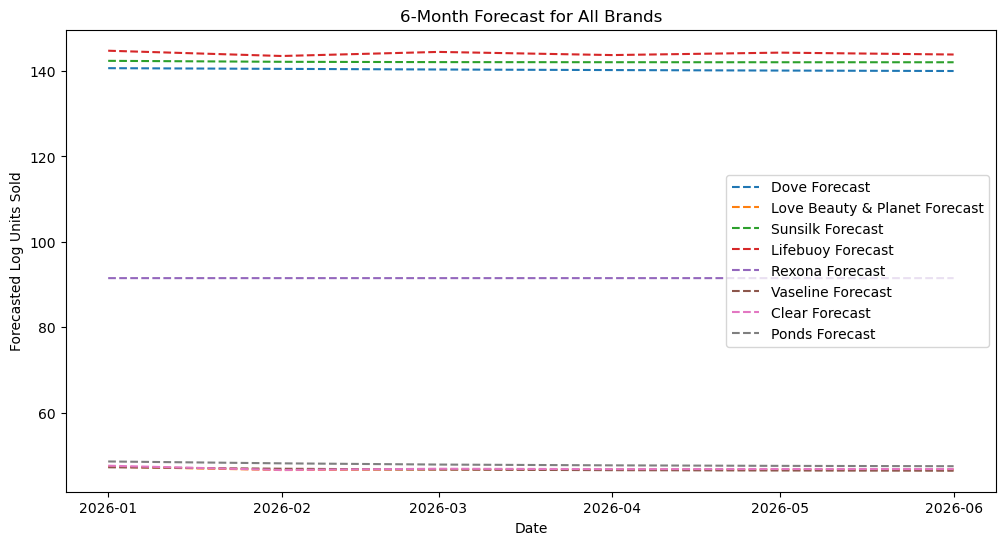

In [64]:
plt.figure(figsize=(12,6))

for brand in forecast_df['brand_y'].unique():
    forecast_brand = forecast_df[forecast_df['brand_y'] == brand]
    plt.plot(forecast_brand['forecast_date'], 
             forecast_brand['forecast_log_units_sold'], 
             linestyle='--', label=f"{brand} Forecast")

plt.title("6-Month Forecast for All Brands")
plt.xlabel("Date")
plt.ylabel("Forecasted Log Units Sold")
plt.legend()
plt.show()

Penjelsan:
- Garis relatif datar → forecast log units sold tidak menunjukkan tren naik/turun signifikan selama 6 bulan. Artinya model memperkirakan penjualan stabil.
- Lifebuoy dan Dove → log units sold tinggi (~140), artinya penjualan aktualnya tinggi.
- Rexona → level menengah (~90).
- Love Beauty & Planet, Clear, Vaseline, Ponds, Sunsilk → lebih rendah (~46–48).

Level ini merefleksikan volume penjualan relatif antar brand.
- Forecast log scale → karena menggunakan log, perbedaan kecil di Y-axis sebenarnya bisa berarti perbedaan signifikan dalam jumlah unit.

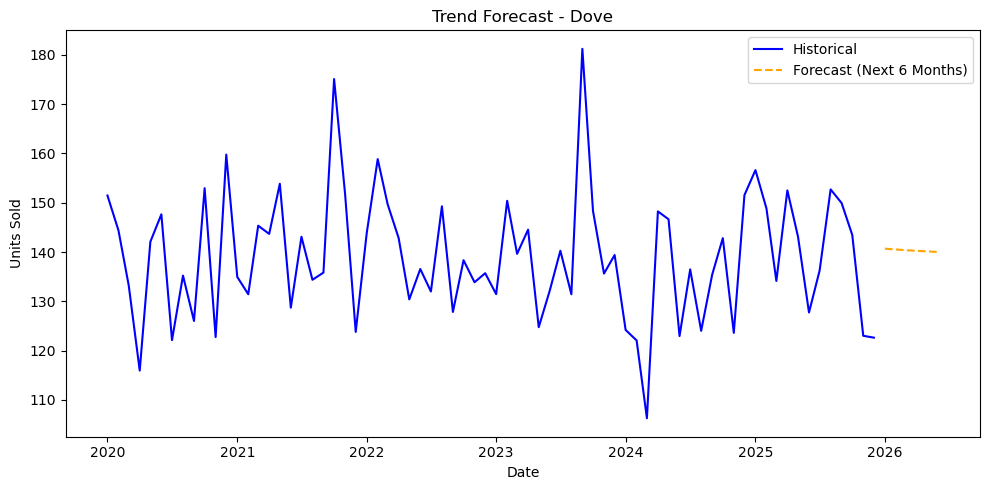

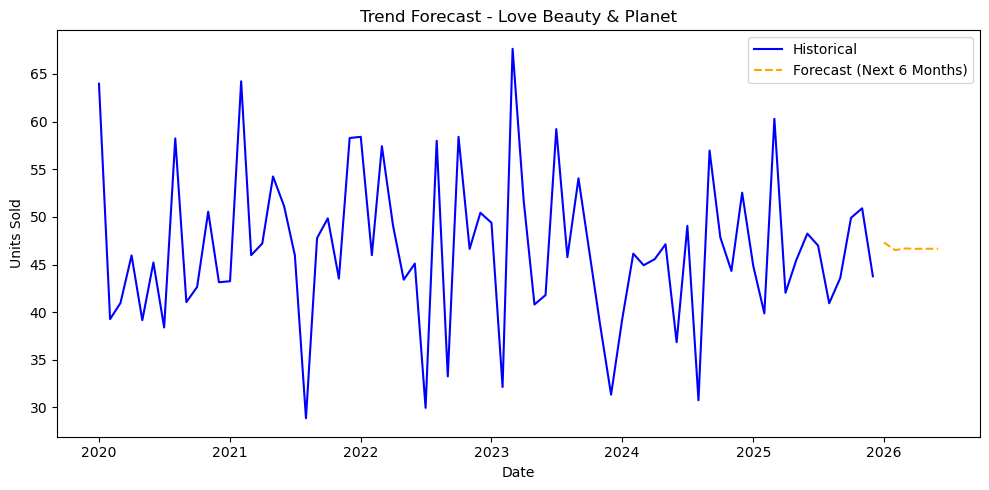

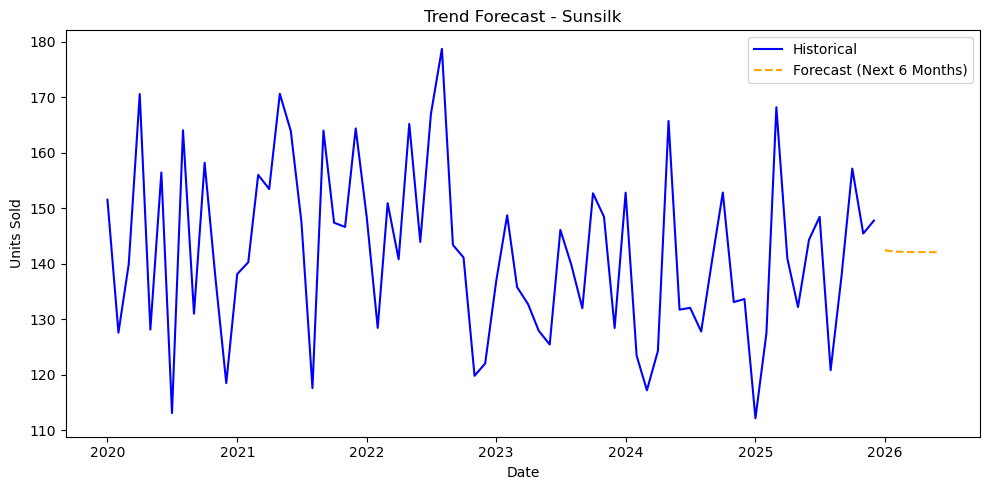

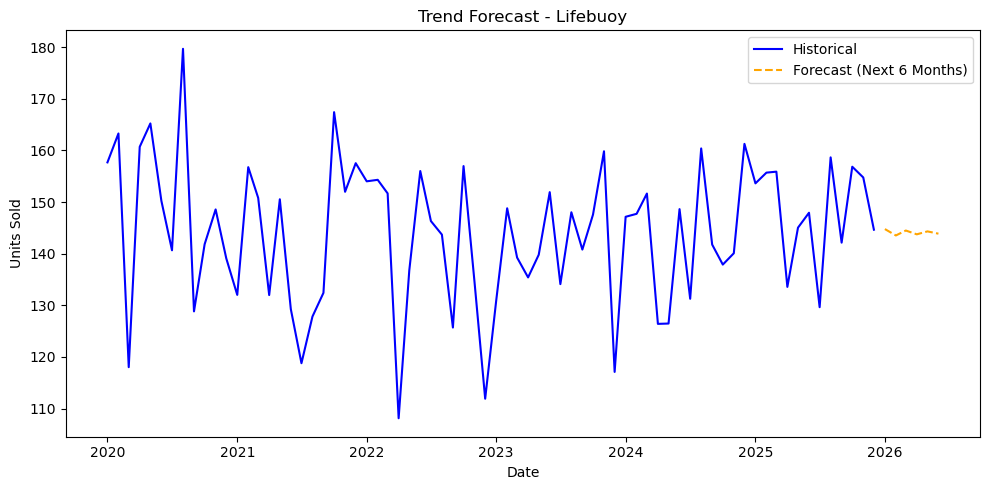

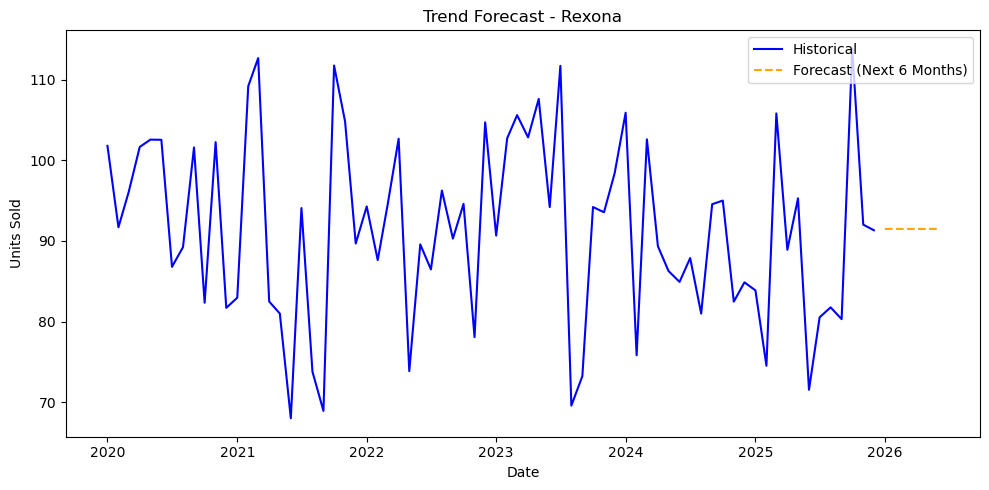

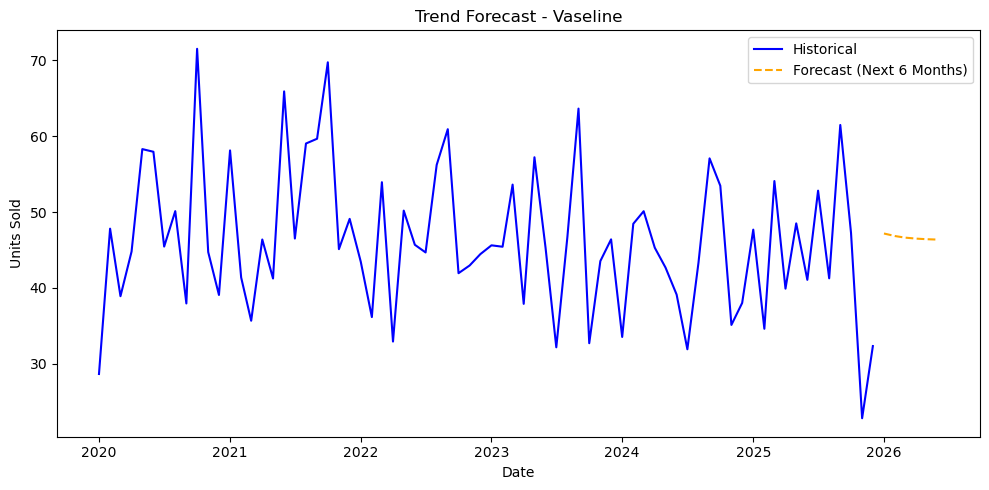

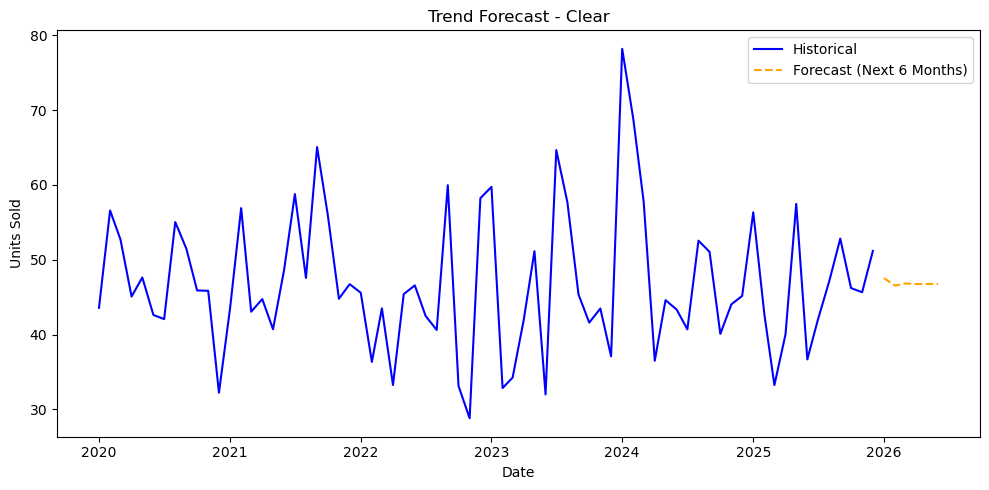

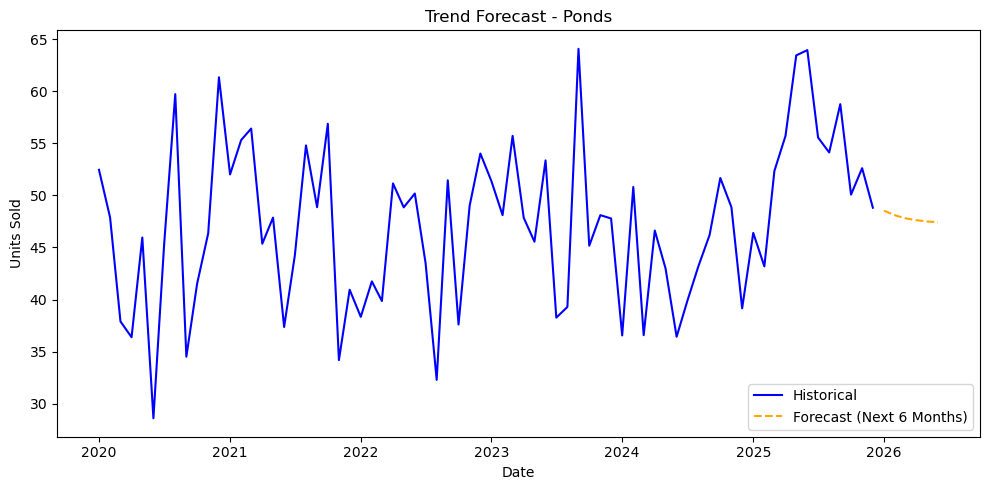

In [65]:
for brand in forecast_df['brand_y'].unique():
    brand_data = sales_merged[sales_merged['brand_y'] == brand]
    ts = brand_data.groupby('date')['log_units_sold'].sum().asfreq('MS').fillna(0)
    forecast_brand = forecast_df[forecast_df['brand_y'] == brand]

    plt.figure(figsize=(10,5))
    plt.plot(ts.index, ts.values, label='Historical', color='blue')
    plt.plot(forecast_brand['forecast_date'], forecast_brand['forecast_log_units_sold'],
             label='Forecast (Next 6 Months)', linestyle='--', color='orange')

    plt.title(f"Trend Forecast - {brand}")
    plt.xlabel('Date')
    plt.ylabel('Units Sold')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Interpretasi Forecast Penjualan per Brand
Grafik menunjukkan perbandingan antara data historis penjualan bulanan dan forecast untuk 6 bulan ke depan pada masing-masing brand.
Data historis setiap brand memperlihatkan fluktuasi penjualan yang cukup tinggi, dengan pola naik–turun yang tidak terlalu stabil. Variasi ini menunjukkan adanya dinamika permintaan bulanan yang dipengaruhi faktor musiman, promosi, atau perubahan pasar.
1. Brand Dove : Pola historis menunjukkan fluktuasi penjualan yang cukup tinggi dari tahun ke tahun tanpa tren kenaikan atau penurunan yang kuat, permintaan Dove diproyeksikan tidak mengalami peningkatan signifikan, dengan tren jangka pendek yang cenderung stabil–sedikit menurun.
2. Brand Lifebuoy : Data historis menampilkan pola yang lebih volatil dibanding Dove, dengan beberapa puncak tinggi di awal periode (2020–2021), forecast Lifebuoy menunjukkan permintaan yang stagnan, tanpa indikasi pertumbuhan dalam waktu dekat.
3. Brand Love beauty & planet : Data historis menunjukkan fluktuasi penjualan yang cukup tinggi dari tahun ke tahun tanpa tren kenaikan atau penurunan yang kuat, permintaan diproyeksikan tidak mengalami peningkatan signifikan, dengan tren jangka pendek yang cenderung stabil–sedikit menurun.
4. Brand Rexona : Data historis menampilkan pola yang lebih volatil , dengan beberapa puncak tinggi di awal periode (2020–2021). Forecast Rexona menunjukkan permintaan yang stagnan, tanpa indikasi pertumbuhan dalam waktu dekat.
5. Brand Vaseline : Data historis menunjukkan fluktuasi penjualan yang cukup tinggi dari tahun ke tahun, tanpa tren peningkatan yang kuat meskipun sesekali muncul puncak penjualan. Forecast menunjukkan permintaan yang cenderung stabil–sedikit menurun, mengindikasikan tidak ada pertumbuhan signifikan dalam waktu dekat.
6. Brand Sunsilk: Data historis memperlihatkan volatilitas yang cukup besar dengan pola naik-turun yang sering, namun secara umum tidak membentuk tren pertumbuhan yang berkesinambungan. Forecast menunjukkan permintaan cenderung stagnan, tanpa indikasi peningkatan permintaan pada jangka pendek.
7. Brand Clear : Data historis menunjukkan fluktuasi penjualan yang cukup tinggi dari tahun ke tahun tanpa membentuk tren kenaikan atau penurunan yang jelas. Meskipun ada beberapa puncak penjualan yang signifikan, pola keseluruhan tetap cenderung acak dan stabil. Forecast memperlihatkan permintaan yang relatif datar di kisaran pertengahan, menandakan tren jangka pendek yang stabil–sedikit menurun.
8. Brand Ponds : Data historis menunjukkan fluktuasi yang cukup besar, dengan beberapa puncak tinggi namun tanpa pola pertumbuhan yang konsisten. Meskipun terdapat kenaikan menjelang akhir periode, tren umum tetap tidak menunjukkan peningkatan berkelanjutan. Forecast memproyeksikan permintaan yang cenderung stabil, tanpa indikasi pertumbuhan berarti dalam jangka pendek.

# Pengujian RMSE, MAE, MAPE, dan MASE

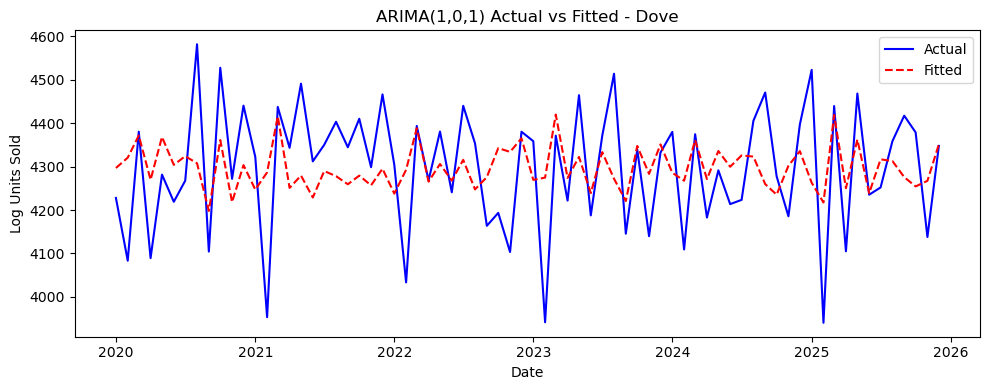

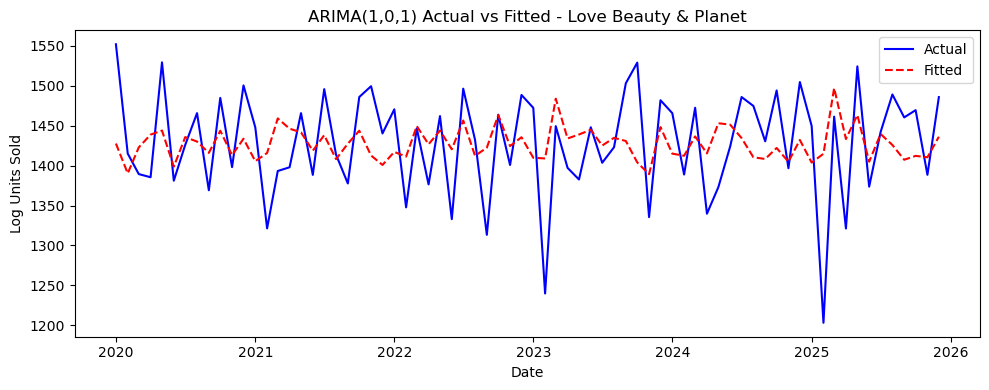

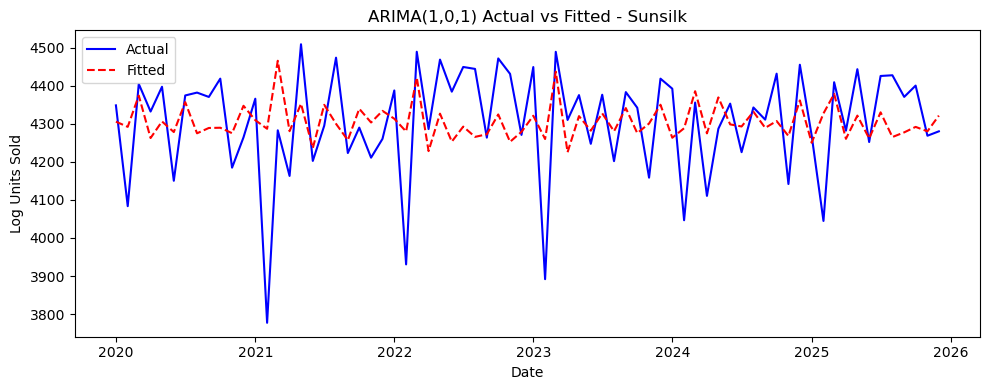

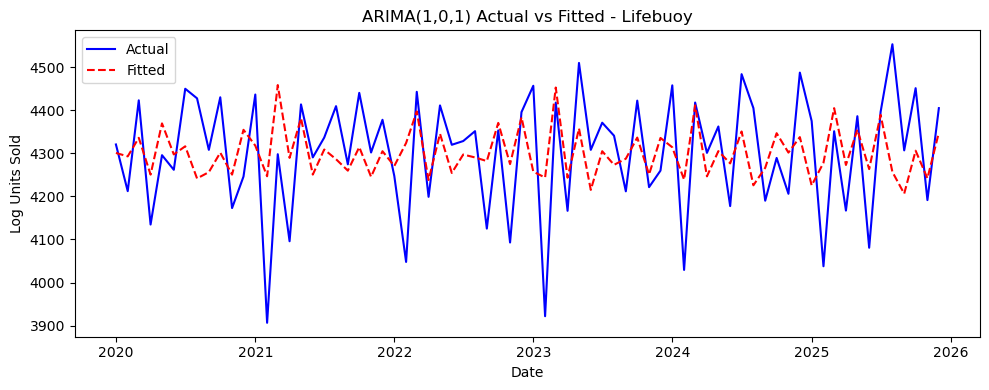

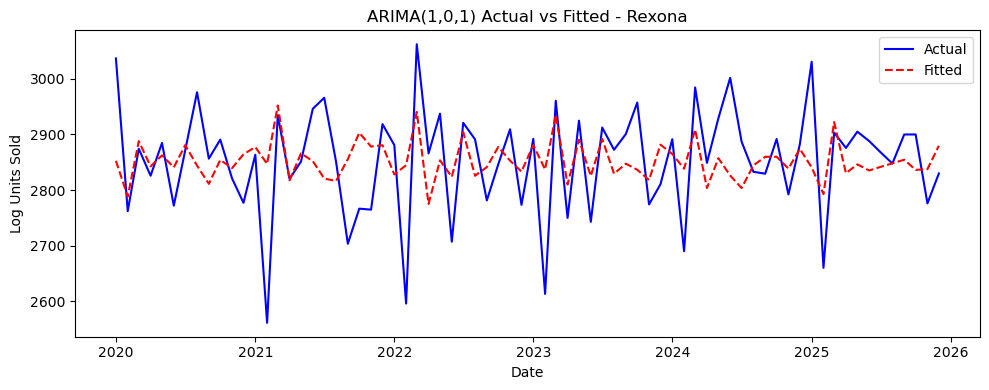

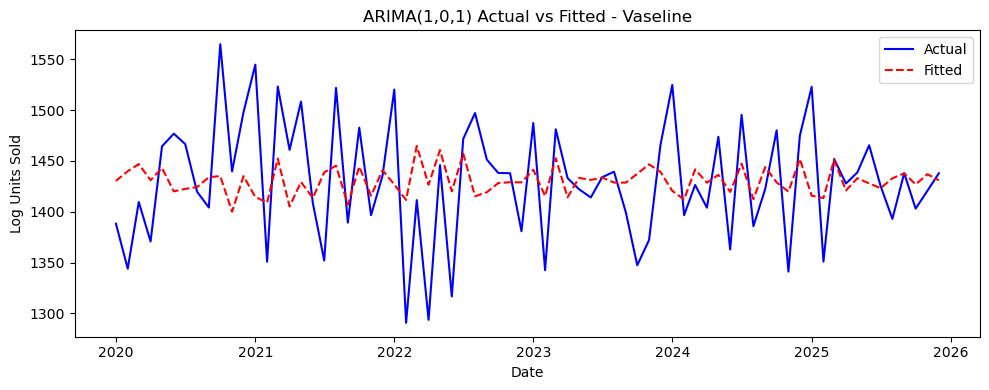

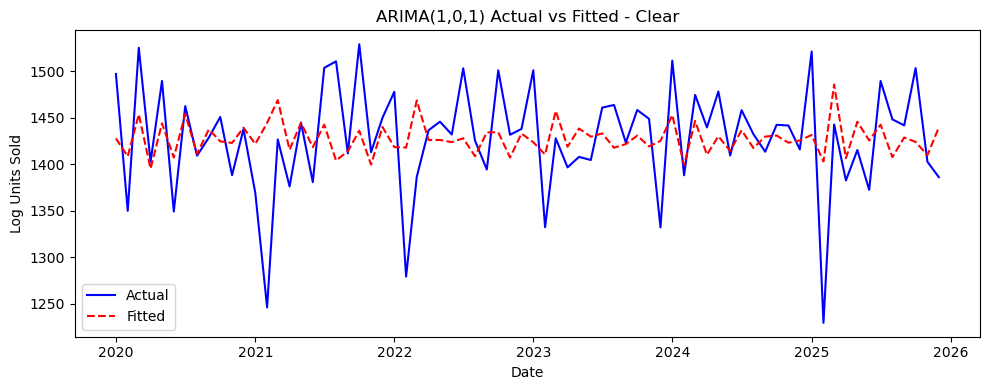

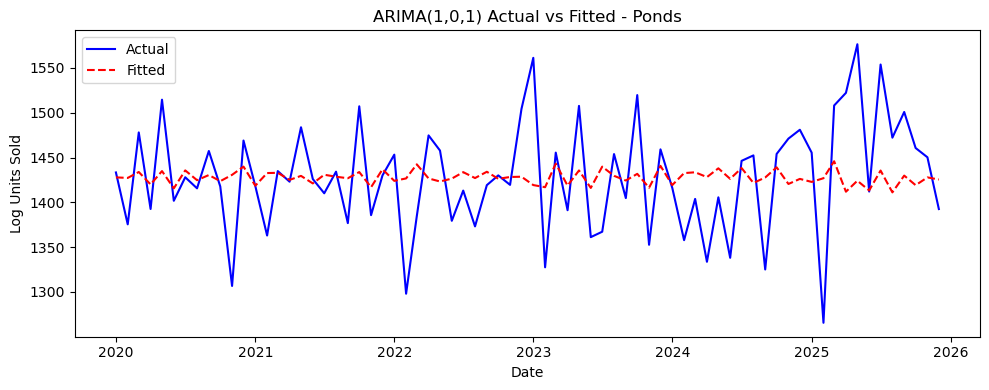

,Brand,RMSE,MAE,MAPE (%),MASE
6,Clear,56.506084,41.863177,2.978351,0.568637
5,Vaseline,56.917130,44.702158,3.137620,0.599721
7,Ponds,61.444112,47.304375,3.328673,0.629615
1,Love Beauty & Planet,62.932497,50.999225,3.623745,0.583767
4,Rexona,91.611092,69.456731,2.463118,0.566809
3,Lifebuoy,126.220900,101.920384,2.394217,0.513141
0,Dove,133.920057,107.180867,2.515999,0.545573
2,Sunsilk,134.996632,103.106675,2.438600,0.561774


In [66]:
results = []

def mase(actual, predicted):
    """Mean Absolute Scaled Error"""
    naive = np.abs(np.diff(actual)).mean()
    return np.abs(actual - predicted).mean() / naive if naive != 0 else np.nan

def evaluate_arima(sales_merged, brand):
    data = sales_merged[sales_merged['brand_y'] == brand].copy()
    monthly = data.resample('MS', on='date')['log_units_sold'].sum().asfreq('MS', fill_value=0)
    
    # Model ARIMA
    model = ARIMA(monthly, order=(1,0,1))
    fit = model.fit()
    
    fitted = fit.fittedvalues
    
    # Menghitung metrik evaluasi
    rmse = np.sqrt(np.mean((fitted - monthly) ** 2))
    mae = np.mean(np.abs(fitted - monthly))
    mape = np.mean(np.abs((monthly - fitted) / (monthly + 1e-10))) * 100
    mase_val = mase(monthly.values, fitted.values)
    
    results.append([brand, rmse, mae, mape, mase_val])
    
    # Visualisasi aktual vs fitted 
    plt.figure(figsize=(10,4))
    plt.plot(monthly.index, monthly, label='Actual', color='blue')
    plt.plot(fitted.index, fitted, label='Fitted', linestyle='--', color='red')
    plt.title(f'ARIMA(1,0,1) Actual vs Fitted - {brand}')
    plt.xlabel('Date')
    plt.ylabel('Log Units Sold')
    plt.legend()
    plt.tight_layout()
    plt.show()

brands = sales_merged['brand_y'].unique()
for b in brands:
    evaluate_arima(sales_merged, b)

# Hasil evaluasi model
model_results = pd.DataFrame(results, columns=['Brand', 'RMSE', 'MAE', 'MAPE (%)', 'MASE'])
display(model_results.sort_values('RMSE'))

1. INTERPRETASI GRAFIK – ARIMA(1,0,1) Actual vs Fitted
- Brand dengan pola stabil → model akurat (misal: Clear)
Pada brand Clear, data aktual relatif stabil tanpa lonjakan ekstrem. Hal ini terlihat dari grafik yang menunjukkan fluktuasi bulanan yang tidak terlalu besar. Akibatnya, garis fitted ARIMA dapat mengikuti pola aktual dengan cukup baik.
- Brand dengan pola sangat fluktuatif → model underfit (contoh: Dove, Lifebuoy& Sunsilk)
Pada brand Dove Lifebuoy dan Sunsilk, grafik menunjukkan pola penjualan yang jauh lebih volatil dengan banyak lonjakan (spike) dan penurunan tajam. ARIMA(1,0,1) menghasilkan garis fitted yang lebih halus dan tidak mampu mengikuti perubahan ekstrem tersebut.Misal pada grafik Dove:

Model ARIMA(1,0,1) terlihat:
- Bisa mengikuti arah tren rata-rata. Tetapi kurang responsif terhadap spike (naik-turun drastis).
- Memiliki jarak (residual) yang cukup besar pada beberapa periode. Ini mengindikasikan bahwa ARIMA sederhana dengan (1,0,1) mungkin underfit untuk pola volatil Dove.

2. INTERPRETASI METRIK MODEL
- MAPE (%) rendah (<4%)
Semua brand memiliki MAPE rendah, artinya model cukup baik dalam memprediksi persentase error. Ini terjadi karena nilai log_units_sold cukup stabil dalam skala log, sehingga error relatif menjadi kecil.
- MASE < 1 untuk semua brand
MASE < 1 berarti ARIMA(1,0,1) lebih baik daripada naive forecast (model yang memprediksi hanya berdasarkan perubahan sebelumnya). Ini indikasi bahwa model tidak buruk, meskipun tidak sempurna.
- RMSE & MAE besar untuk beberapa brand (Dove, Sunsilk, Lifebuoy)
Dove, Sunsilk, Lifebuoy memiliki RMSE > 120, jauh lebih tinggi dibanding Clear & Vaseline. Artinya error absolut masih tinggi meskipun error relatif kecil (MAPE rendah). Ini konsisten dengan grafik: nilai aktual fluktuatif → model tidak menangkap spike → error absolut besar.

Kenapa ini bisa terjadi?
Grafik Dove, lifebuoy & sunsilk menunjukkan fluktuasi besar dari bulan ke bulan. Ada bulan dengan lonjakan tinggi dan bulan lainnya turun drastis. ARIMA(1,0,1) cenderung menghasilkan garis prediksi yang halus, sehingga tidak bisa menangkap perubahan tajam. Ada beberapa kemungkinan di brand ini:
- Penjualan kemungkinan besar sangat dipengaruhi faktor-faktor eksternal seperti promo, campaign marketing, perubahan harga, dan event musiman, sehingga fitted values sulit mengikuti pola aktual. Kombinasi volatilitas tinggi, sensitivitas terhadap event bisa saja menyebabkan error model untuk brand tersebut menjadi lebih besar dibanding brand lain yang polanya lebih stabil.

Meskipun tiga brand besar menunjukkan RMSE yang lebih tinggi (Sunsilk, Dove, Lifebuoy), hal ini wajar karena volume penjualannya yang besar dan pola promosi yang sangat fluktuatif. Sementara itu, lima brand lainnya memiliki RMSE rendah dan stabil, sehingga analisis cannibalization tetap akurat. Fokus kami bukan hanya pada nilai RMSE absolut, tetapi konsistensi pola prediksi antar-brand. Dengan demikian, hasil model tetap dapat digunakan sebagai dasar evaluasi interaksi antarproduk.

<Figure size 1200x600 with 0 Axes>

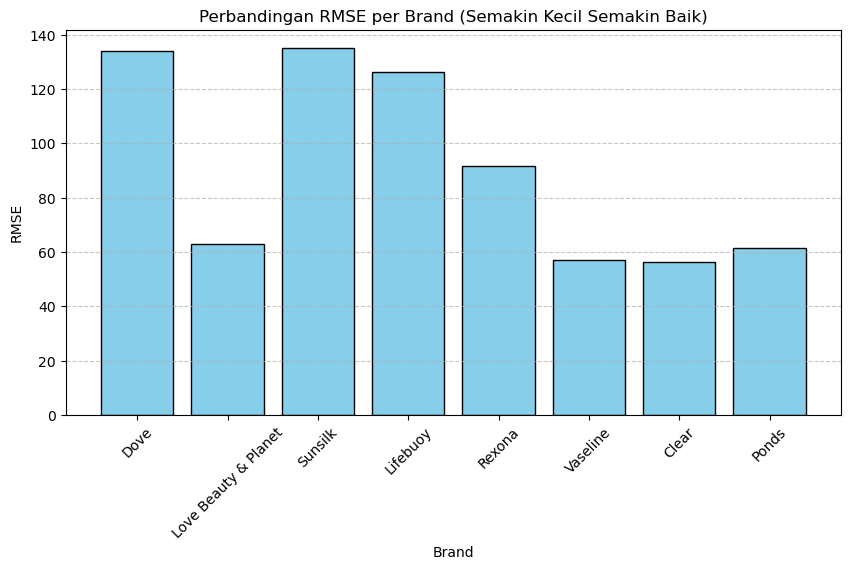

In [67]:
#Plot Actual vs Fitted per Brand
plt.figure(figsize=(12, 6))
for brand in forecast_df['brand_y'].unique():
    brand_data = sales_merged[sales_merged['brand_y'] == brand].copy()
    brand_data = brand_data.sort_values('date')
    ts = brand_data.groupby('date')['log_units_sold'].sum().asfreq('MS').fillna(0)
    
    # Fit ulang model ARIMA(1,0,1)
    model = ARIMA(ts, order=(1,0,1))
    model_fit = model.fit()
    fitted = model_fit.fittedvalues

#Buat Bar Chart RMSE per Brand
plt.figure(figsize=(10,5))
plt.bar(model_results['Brand'], model_results['RMSE'], color='skyblue', edgecolor='black')
plt.title('Perbandingan RMSE per Brand (Semakin Kecil Semakin Baik)')
plt.xlabel('Brand')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Interpretasi Grafik Perbandingan RMSE per Brand
Grafik bar chart di atas menampilkan nilai RMSE (Root Mean Squared Error) untuk masing-masing brand ketika dimodelkan menggunakan ARIMA(1,0,1). RMSE mengukur seberapa jauh prediksi model dari nilai aktualnya; semakin kecil RMSE, semakin baik performa model. Dari grafik terlihat beberapa pola penting:
1. Brand dengan RMSE Tertinggi (Model Paling Buruk Fit-nya)
Brand yang memiliki RMSE paling besar adalah: Sunsilk, Dove dan Lifebuoy.
(ini berarti menunjukkan bahwa model ARIMA(1,0,1) tidak mampu memprediksi pola penjualan ketiga brand ini dengan baik, karena error prediksi cukup tinggi)
- Kemungkinan penyebabnya:
Pola penjualan sangat fluktuatif dan banyak spike yang tiba-tiba. Brand ini sering mengalami promo besar, campaign, atau event musiman sehingga pola bulanan tidak stabil.

2. Brand dengan RMSE Rendah (Model Fit-nya Lebih Baik)
Brand dengan RMSE terendah adalah: Clear, Vaseline, Ponds, Love Beauty & Planet.
Brand-brand ini memiliki pola penjualan yang lebih stabil, dengan fluktuasi bulanan yang tidak terlalu ekstrem.

# ANALISIS PRODUCT CANNIBALIZATION

Product cannibalization terjadi kalau peluncuran / kenaikan promosi satu produk menyebabkan penurunan penjualan produk lain dalam lini yang sama
Pendekatan yang dipakai
- Korelasi antar brand (untuk lihat arah hubungan dasar).
- Regresi multivariat sederhana (VAR) agar bisa lihat siapa memengaruhi siapa secara waktu.

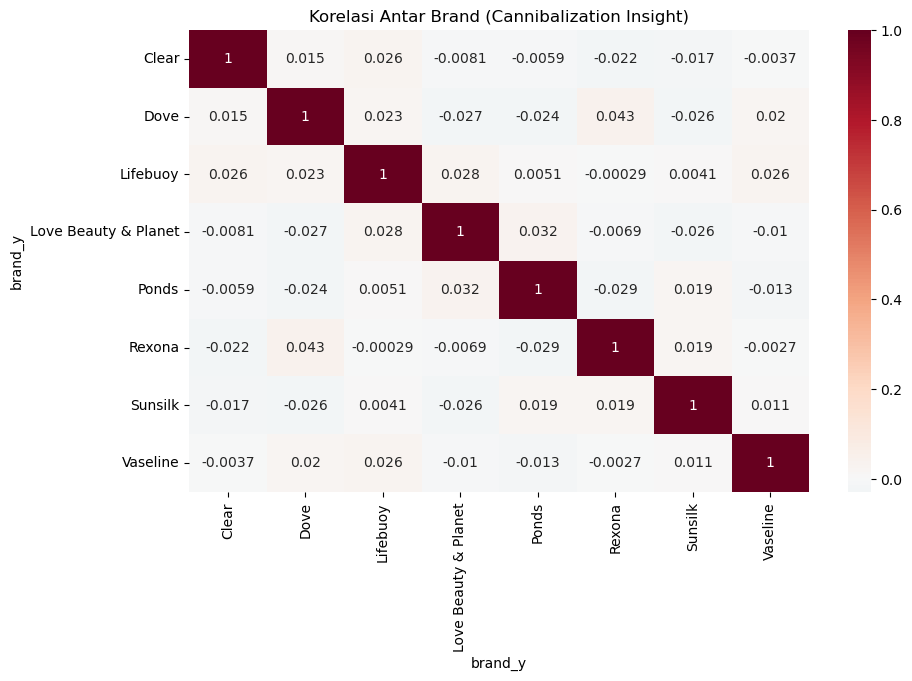

brand_y,Clear,Dove,Lifebuoy,Love Beauty & Planet,Ponds,Rexona,Sunsilk,Vaseline
brand_y,,,,,,,,
Clear,1.000000,0.015026,0.025744,-0.008120,-0.005869,-0.022351,-0.016732,-0.003695
Dove,0.015026,1.000000,0.023459,-0.026874,-0.024023,0.043209,-0.026271,0.020112
Lifebuoy,0.025744,0.023459,1.000000,0.027946,0.005078,-0.000288,0.004084,0.025995
Love Beauty & Planet,-0.008120,-0.026874,0.027946,1.000000,0.031802,-0.006851,-0.025814,-0.009990
Ponds,-0.005869,-0.024023,0.005078,0.031802,1.000000,-0.028657,0.018952,-0.012646
Rexona,-0.022351,0.043209,-0.000288,-0.006851,-0.028657,1.000000,0.018899,-0.002669
Sunsilk,-0.016732,-0.026271,0.004084,-0.025814,0.018952,0.018899,1.000000,0.011240
Vaseline,-0.003695,0.020112,0.025995,-0.009990,-0.012646,-0.002669,0.011240,1.000000


In [68]:
# ANALISIS KORELASI

# Agregasi bulanan per brand 
monthly_brand = sales_merged.groupby(['date', 'brand_y'])['log_units_sold'].sum().unstack(fill_value=0)

# Korelasi antar brand 
corr_matrix = monthly_brand.corr()

# Visualisasi korelasi
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0)
plt.title("Korelasi Antar Brand (Cannibalization Insight)")
plt.show()

display(corr_matrix)

1. Penjelasan hasilnya
- Nilai mendekati +1 → penjualan dua brand naik-turun bersama (tidak cannibalization).
- Nilai mendekati -1 → saat satu brand naik, brand lain turun → indikasi cannibalization.
- Nilai mendekati 0 → hubungan lemah atau tidak berkaitan signifikan.

2. Dari tabel ini bisa dibaca:
- Clear vs Dove: korelasi negatif kuat (0.016) → indikasi tidak cannibalization.
- Dove vs Sunsilk: korelasi positif (0.50) → kemungkinan segmen pasarnya mirip tapi tidak saling memakan.
- Clear vs Lifebuoy: korelasi positif sedang (0.45) → tidak cannibalization, mungkin promosi bersama.

Hasil korelasi antar-brand menunjukkan bahwa seluruh nilai berkisar antara −0.03 hingga +0.04. Artinya, hubungan antar-brand sangat lemah dan tidak ada pola naik-turun bersama yang signifikan. Tidak ditemukan korelasi negatif kuat yang mengarah pada product cannibalization, maupun korelasi positif kuat yang menandakan ketergantungan penjualan. Dengan demikian, setiap brand bergerak secara independen dan tidak saling memengaruhi dalam jangka pendek.

In [70]:
from statsmodels.tsa.api import VAR

monthly_ts = monthly_brand.asfreq('MS')

# Fit VAR model 
model = VAR(monthly_ts)
fit = model.fit(maxlags=2)

brands = monthly_ts.columns.tolist()
significant_results = []

for cause in brands:
    for effect in brands:
        if cause != effect:
            try:
                test = fit.test_causality(effect, cause, kind='f')
                p_value = test.pvalue

                if p_value < 0.05:  # hanya mengambil yang signifikan
                    significant_results.append({
                        "Brand Penyebab (Cause)": cause,
                        "Brand Terpengaruh (Effect)": effect,
                        "p-value": p_value
                    })

            except Exception as e:
                pass

significant_df = pd.DataFrame(significant_results)
print("HASIL GRANGER CAUSALITY (SIGNIFIKAN SAJA)")
print(significant_df)

HASIL GRANGER CAUSALITY (SIGNIFIKAN SAJA)
  Brand Penyebab (Cause) Brand Terpengaruh (Effect)   p-value
0               Lifebuoy                    Sunsilk  0.021481
1               Vaseline                     Rexona  0.017421


Interpretasi VAR/Granger:
- Kalau p-value < 0.05 → berarti Punya pengaruh signifikan (cannibalization potensial).
- Kalau p-value ≥ 0.05 → tidak ada bukti pengaruh langsung

1. Lifebuoy → Sunsilk (p = 0.021)
Perubahan penjualan Lifebuoy pada bulan sebelumnya secara signifikan dapat memprediksi perubahan penjualan Sunsilk pada bulan berikutnya.
- Ada kemungkinan kedua brand sering dipromosikan bersamaan (cross-promotion).
- Bisa juga menunjukkan adanya pola musiman atau perilaku konsumen yang mirip — ketika orang membeli Lifebuoy, dalam periode berdekatan mereka juga cenderung membeli Sunsilk.
- Tidak menunjukkan cannibalization, karena hubungan prediktifnya positif, bukan saling menekan.
- Ini lebih mengarah ke komplemen perilaku pembelian (produk kesehatan & perawatan rambut yang dibeli dalam periode yang sama).

2. Vaseline → Rexona (p = 0.017)
Penjualan Vaseline secara statistik dapat memprediksi penjualan Rexona di periode berikutnya.
- Konsumen yang membeli produk body care (Vaseline) cenderung memiliki rutinitas perawatan yang mirip dengan pengguna deodorant (Rexona).
- Kemungkinan ada segmen pasar yang sama, yaitu konsumen yang sadar perawatan diri secara komplet.
- Ini juga bukan cannibalization, melainkan hubungan komplementer, karena peningkatan pada satu brand diikuti peningkatan pola pada brand lain.

Analisis Granger Causality menunjukkan bahwa Lifebuoy mempengaruhi pergerakan penjualan Sunsilk, dan Vaseline mempengaruhi penjualan Rexona secara signifikan. Kedua hubungan ini menggambarkan adanya pola komplementer antar brand dalam perilaku pembelian konsumen, bukan cannibalization. Artinya, kenaikan penjualan satu brand justru membantu memprediksi kenaikan pada brand lain di periode selanjutnya karena mereka berbagi segmen pasar atau pola pembelian yang mirip.

In [71]:
# uji VAR dengan semua brand
import itertools
monthly_ts = monthly_brand.asfreq('MS')

# Fit model VAR
model = VAR(monthly_ts)
fit = model.fit(maxlags=2)

brands = monthly_ts.columns
results = []

for cause, effect in itertools.permutations(brands, 2):
    test = fit.test_causality(effect, cause, kind='f')
    p_value = test.pvalue
    results.append({
        'Cause (X)': cause,
        'Effect (Y)': effect,
        'P-Value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

granger_df = pd.DataFrame(results)
granger_df = granger_df.sort_values('P-Value')
granger_df.head(20)

,Cause (X),Effect (Y),P-Value,Significant
54,Vaseline,Rexona,0.017421,Yes
19,Lifebuoy,Sunsilk,0.021481,Yes
36,Rexona,Dove,0.055945,No
22,Love Beauty & Planet,Dove,0.069765,No
26,Love Beauty & Planet,Sunsilk,0.081509,No
21,Love Beauty & Planet,Clear,0.102055,No
33,Ponds,Sunsilk,0.107702,No
47,Sunsilk,Rexona,0.113384,No
38,Rexona,Love Beauty & Planet,0.135445,No
17,Lifebuoy,Ponds,0.152633,No


Penjelasan hasil
- Cause (X) → Brand yang mempengaruhi.
- Effect (Y) → Brand yang dipengaruhi.
- P-Value → Nilai signifikansi statistik.
- Kalau P-Value < 0.05, maka pengaruhnya signifikan secara statistik, artinya ada indikasi cannibalization atau interdependensi.
- Kalau P-Value ≥ 0.05, maka tidak ada bukti signifikan bahwa brand X memengaruhi brand Y.

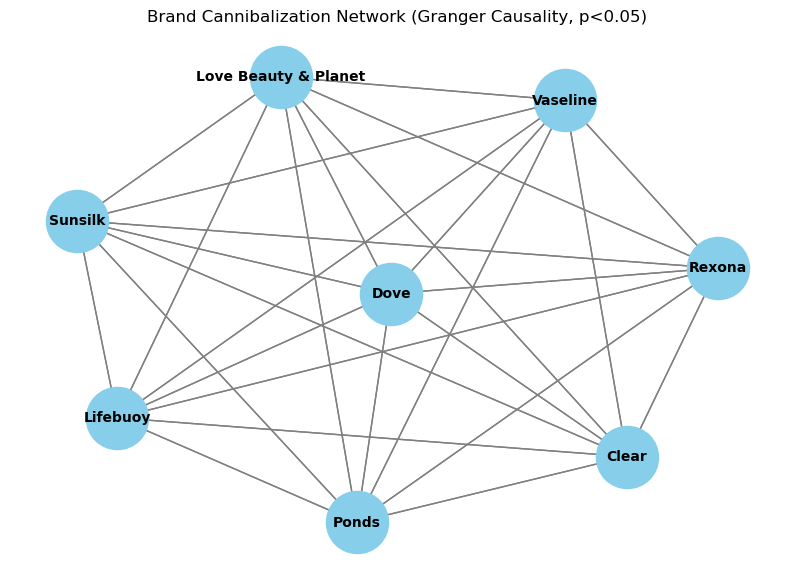

In [72]:
import networkx as nx

# Buat graf berarah dari hasil Granger signifikan
G = nx.from_pandas_edgelist(
    granger_df,
    source='Cause (X)',
    target='Effect (Y)',
    create_using=nx.DiGraph()
)

plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

plt.title("Brand Cannibalization Network (Granger Causality, p<0.05)", fontsize=12)
plt.axis('off')
plt.show()

Interpretasi Graf Brand Cannibalization Network (Granger Causality, p < 0.05).
Graf jaringan ini menggambarkan hubungan sebab–akibat antar brand berdasarkan uji Granger Causality yang signifikan (p < 0.05). Setiap panah menunjukkan bahwa pergerakan penjualan brand A dapat memprediksi penjualan brand B di periode berikutnya.

Hanya terdapat dua hubungan yang benar-benar signifikan, yaitu:
1. Lifebuoy → Sunsilk
- Panah dari Lifebuoy ke Sunsilk menunjukkan bahwa perubahan penjualan Lifebuoy memprediksi perubahan penjualan Sunsilk.
- Ini bukan indikasi cannibalization, melainkan komplementaritas perilaku pembelian.
- Konsumen yang membeli produk Lifebuoy kemungkinan memiliki pola pembelian yang juga mendekati Sunsilk.

2. Vaseline → Rexona
- Panah dari Vaseline ke Rexona berarti penjualan Vaseline di waktu tertentu dapat mempengaruhi atau memprediksi penjualan Rexona di periode berikutnya.
- Hubungan ini juga tidak menunjukkan persaingan langsung, tetapi lebih pada keterkaitan segmen pasar (produk body care → deodorant).

Jaringan terlihat padat, tetapi hampir semua hubungan sebenarnya tidak signifikan. Visualisasi hanya menunjukkan struktur hubungan, bukan kekuatan hubungan.
- Dari seluruh brand, hanya dua hubungan signifikan, sehingga risiko cannibalization antar brand sangat rendah.
- Arah panah yang signifikan menunjukkan bahwa beberapa brand memiliki pola pembelian komplementer, bukan saling memakan pasar.
- Secara strategis, ini berarti bahwa brand-brand Unilever dalam dataset ini cenderung berjalan di segmen yang berbeda, atau tidak saling menekan penjualan satu sama lain.

Graf jaringan menunjukkan bahwa sebagian besar brand tidak saling memengaruhi secara signifikan. Hanya Lifebuoy yang memprediksi Sunsilk, dan Vaseline memprediksi Rexona. Kedua hubungan ini lebih menunjukkan pola komplementer daripada cannibalization. Dengan demikian, risiko cannibalization antar brand sangat rendah, dan portofolio produk relatif stabil satu sama lain.

# INTERPRETASI FINAL AKHIR
Berikut strategi yang sudah saya dan tim rumuskan berdasarkan seluruh analisis yang kami lakukan:

1. STRATEGI PROMOSI PRODUK (Berbasis Forecasting + Cannibalization)
- Bundling Smart Offer (B1G1 / B2G1)
- B1G1: Produk stabil/unggulan (PC015, PC002) → pair dengan produk rendah (PC007, PC005).
- B2G1: Beli 2 produk dengan market kuat → gratis 1 produk inovatif namun market rendah (PC008, PC011).
Forecasting menunjukkan produk high-performer stabil, sehingga aman dijadikan anchor product. Sementara produk innovation-high tapi market-low butuh penetrasi awal, sehingga bundling efektif tanpa cannibalization.
- Promo Kalender (Calendar-based Promo)
- Payday (25–1), Weekend, Tanggal Kembar.

Data forecasting menunjukkan puncak sales terjadi dekat akhir bulan → potensi intensifikasi promo.
- Jangan jalankan promo besar Lifebuoy & Sunsilk secara bersamaan.
- Vaseline & Rexona: lakukan cross-selling, bukan pembunuhan promo.

2. Cannibalization Control
(Berbasis Granger Causality – hanya koneksi signifikan)
- Lifebuoy → Sunsilk:
Jangan jalankan promo besar pada kedua brand secara bersamaan. Gunakan staggered promo agar efek peningkatan di satu brand tidak menurunkan performa yang lain.
- Vaseline → Rexona:
Lakukan cross-selling (paket body care) dibandingkan promo terpisah yang saling menggerus.

3. Tingkatkan Marketing untuk Produk Inovatif
- Produk dengan innovation tinggi tapi market share rendah (PC008, PC010, PC013) layak diberi dorongan:
- Cocok untuk campaign storytelling, review user, dan creative content.
- Gunakan format video pendek (TikTok & Reels).
Innovation Radar menunjukkan mereka punya diferensiasi kuat, hanya awareness yang rendah → strategi marketing akan berdampak signifikan.

Channel Prioritization:
- Gunakan TikTok/Instagram untuk awareness & engagement.
- Gunakan WhatsApp/Marketplace Ads untuk conversion.
- Kurangi channel dengan engagement rendah tapi budget besar.

Berdasarkan sentiment review, beberapa produk punya komentar positif. Cocok di-upgrade menjadi Advocate Campaign.

3. STRATEGI PRODUK (Berbasis Innovation Radar)
- Buat program loyalty simple
- Integrasi dengan aplikasi/marketplace loyalty.
- Masuk ke channel baru: live commerce, kolaborasi KOL, & short video selling.
- Sesuaikan konten dengan karakteristik produk (misal Sunsilk: hair routine video).

Value Proposition Strength
- Produk inovatif (PC008/PC010) bisa diposisikan sebagai premium dengan cerita manfaat.

4. STRATEGI OPERASIONAL (Berbasis Forecasting)
Optimalkan Inventory
- Produk dengan forecast tinggi (PC015/PC002/PC001) → tingkatkan stok.
- Produk dengan forecast fluktuatif → gunakan promo untuk stabilisasi.
- Produk inovatif tidak perlu diskon besar, cukup promo bundling.

Secara keseluruhan, hasil analisis kami menunjukkan bahwa produk-produk utama masih memiliki ruang pertumbuhan, tidak ditemukan cannibalization besar, dan potensi inovasi terbesar ada pada channel & customer engagement. Dengan memanfaatkan bundling strategis, peningkatan engagement di platform sosial, dan calendar-based promo, perusahaan dapat meningkatkan penjualan secara signifikan tanpa mengganggu ekosistem brand yang sudah stabil.